# Final Project - Stocks Prediction - TSLA


### Importing Libraries

In [49]:
# Libraries
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from scipy.stats import linregress
import seaborn as seaborninstance

In [50]:
# Import Stock data
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 8, 22)
tsla = web.DataReader('TSLA', "yahoo", start, end)
tsla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-13,1651.180054,1567.260010,1611.00000,1621.000000,20425300,1621.000000
2020-08-14,1668.800049,1626.640015,1664.98999,1650.709961,12577600,1650.709961
2020-08-17,1845.859985,1672.829956,1677.00000,1835.640015,20242300,1835.640015
2020-08-18,1923.900024,1845.109985,1898.98999,1887.089966,16436600,1887.089966
2020-08-19,1911.000000,1841.209961,1865.00000,1904.000000,8713271,1904.000000


### Cleaning Data

In [51]:
# Cleaning Data: reset index and rename columns
tsla.reset_index(inplace = True)
tsla = tsla.rename(columns={'Adj Close': 'Adj_Close'})
tsla

,Date,High,Low,Open,Close,Volume,Adj_Close
0,2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
1,2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2,2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
3,2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
4,2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
...,...,...,...,...,...,...,...
1413,2020-08-13,1651.180054,1567.260010,1611.000000,1621.000000,20425300,1621.000000
1414,2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961
1415,2020-08-17,1845.859985,1672.829956,1677.000000,1835.640015,20242300,1835.640015
1416,2020-08-18,1923.900024,1845.109985,1898.989990,1887.089966,16436600,1887.089966


In [52]:
# Export file as a CSV, without the Pandas index, but with the header
tsla.to_csv("tsla.csv", index=False, header=True)

### Analysing Data

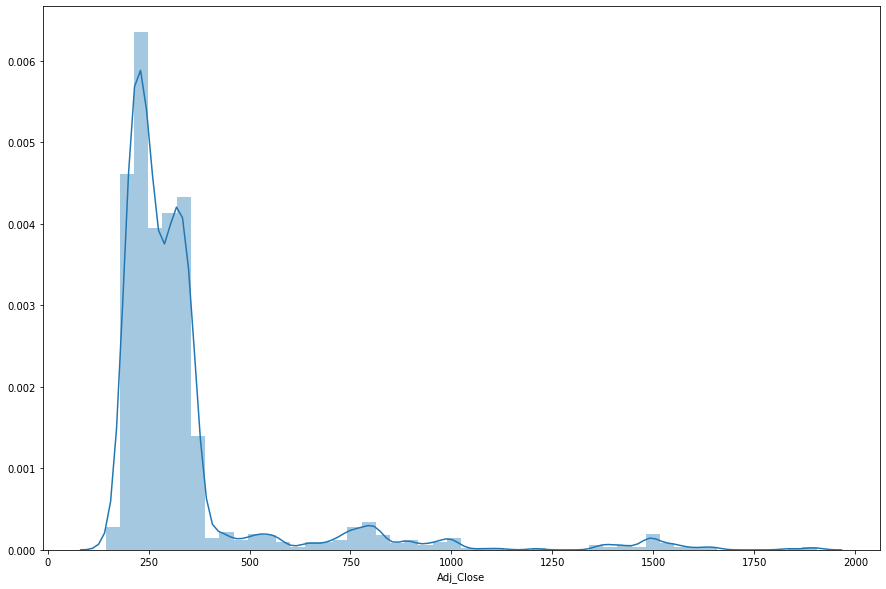

In [53]:
# Determine Average Adj close Price of the stock
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborninstance.distplot(tsla['Adj_Close'])

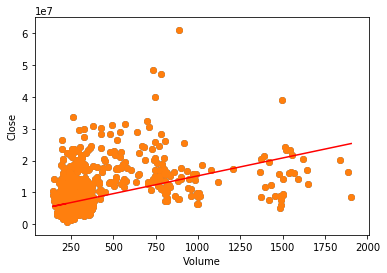

The r-squared is: 0.21015457082194


In [54]:
# Analyze Correlation between Volume and Closing Price
x_values = tsla['Close']
y_values = tsla['Volume']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()
print(f"The r-squared is: {rvalue**2}")

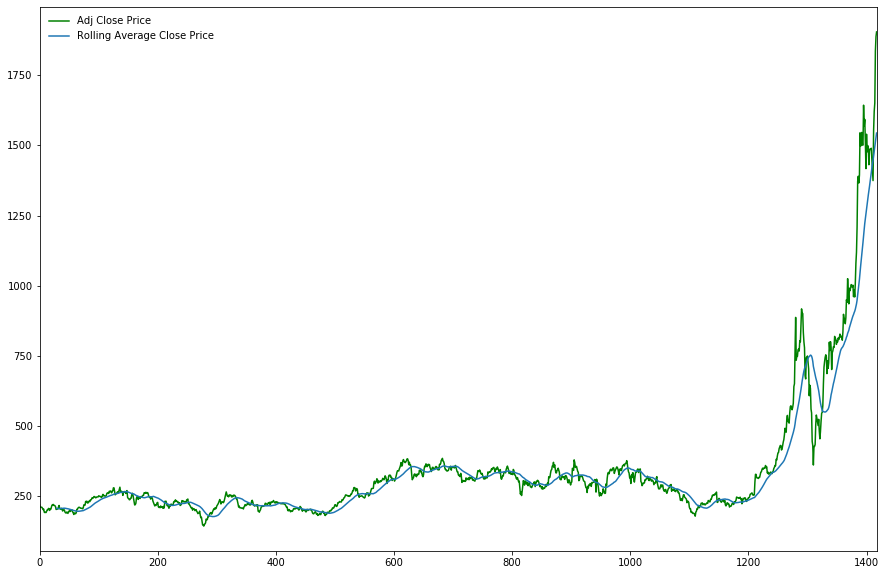

In [55]:
# Analyze the Adj Close Price over time and rolling average close price
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(tsla['Adj_Close'],label = 'Adj Close Price',color='green')
#plt.plot(df_total['High'],label = 'High Price',color='blue')
#plt.plot(df_total['Close'],label = 'Close Price',color ='orange')
tsla['Adj_Close'].rolling(window=30).mean().plot(label = 'Rolling Average Close Price')
plt.legend(loc='upper left', frameon=False)

### Formating Data to Feed ML

In [56]:
# Shift Adj_Close Price by 1 day, to obtein Price_Change
tsla['Prev_Close'] = tsla[['Adj_Close']].shift(1)
tsla['Price_Change'] = tsla['Adj_Close'] - tsla['Prev_Close']
tsla

,Date,High,Low,Open,Close,Volume,Adj_Close,Prev_Close,Price_Change
0,2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,NaN,NaN
1,2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,219.309998,-9.220001
2,2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,210.089996,1.190002
3,2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,211.279999,-0.330002
4,2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,210.949997,-0.330002
...,...,...,...,...,...,...,...,...,...
1413,2020-08-13,1651.180054,1567.260010,1611.000000,1621.000000,20425300,1621.000000,1554.760010,66.239990
1414,2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961,1621.000000,29.709961
1415,2020-08-17,1845.859985,1672.829956,1677.000000,1835.640015,20242300,1835.640015,1650.709961,184.930054
1416,2020-08-18,1923.900024,1845.109985,1898.989990,1887.089966,16436600,1887.089966,1835.640015,51.449951


In [57]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 9 columns):
Date            1418 non-null datetime64[ns]
High            1418 non-null float64
Low             1418 non-null float64
Open            1418 non-null float64
Close           1418 non-null float64
Volume          1418 non-null int64
Adj_Close       1418 non-null float64
Prev_Close      1417 non-null float64
Price_Change    1417 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 99.8 KB


In [61]:
# Rolling average Price_Change by 30 days
tsla['PC_Rolling_Avg'] = tsla.iloc[:,8].rolling(window=30).mean()
tsla

,Date,High,Low,Open,Close,Volume,Adj_Close,Prev_Close,Price_Change,PC_Rolling_Avg
0,2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,NaN,NaN,NaN
1,2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,219.309998,-9.220001,NaN
2,2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,210.089996,1.190002,NaN
3,2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,211.279999,-0.330002,NaN
4,2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,210.949997,-0.330002,NaN
...,...,...,...,...,...,...,...,...,...,...
1413,2020-08-13,1651.180054,1567.260010,1611.000000,1621.000000,20425300,1621.000000,1554.760010,66.239990,16.712333
1414,2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961,1621.000000,29.709961,14.734998
1415,2020-08-17,1845.859985,1672.829956,1677.000000,1835.640015,20242300,1835.640015,1650.709961,184.930054,15.468669
1416,2020-08-18,1923.900024,1845.109985,1898.989990,1887.089966,16436600,1887.089966,1835.640015,51.449951,16.574333


In [73]:
# Price_Change Static_Average
tsla['PC_Static_Avg'] = tsla.iloc[:,9].mean()
tsla

,Date,High,Low,Open,Close,Volume,Adj_Close,Prev_Close,Price_Change,PC_Rolling_Avg,PC_Static_Avg
0,2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,NaN,NaN,NaN,0.963219
1,2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,219.309998,-9.220001,NaN,0.963219
2,2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,210.089996,1.190002,NaN,0.963219
3,2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,211.279999,-0.330002,NaN,0.963219
4,2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,210.949997,-0.330002,NaN,0.963219
...,...,...,...,...,...,...,...,...,...,...,...
1413,2020-08-13,1651.180054,1567.260010,1611.000000,1621.000000,20425300,1621.000000,1554.760010,66.239990,16.712333,0.963219
1414,2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961,1621.000000,29.709961,14.734998,0.963219
1415,2020-08-17,1845.859985,1672.829956,1677.000000,1835.640015,20242300,1835.640015,1650.709961,184.930054,15.468669,0.963219
1416,2020-08-18,1923.900024,1845.109985,1898.989990,1887.089966,16436600,1887.089966,1835.640015,51.449951,16.574333,0.963219


In [64]:
tsla.dtypes

Date              datetime64[ns]
High                     float64
Low                      float64
Open                     float64
Close                    float64
Volume                     int64
Adj_Close                float64
Prev_Close               float64
Price_Change             float64
PC_Rolling_Avg           float64
PC_Static_Avg            float64
dtype: object

### Linear Regression

In [65]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = tsla[["Prev_Close", "PC_Rolling_Avg","PC_Static_Avg"]]
y = tsla['Adj_Close']
#Remove the forecasted number of rows
X = X[30:]
y = y[30:]
print(y)
print(X)

30       204.350006
31       204.460007
32       211.710007
33       217.110001
34       207.339996
           ...     
1413    1621.000000
1414    1650.709961
1415    1835.640015
1416    1887.089966
1417    1904.000000
Name: Adj_Close, Length: 1388, dtype: float64
       Prev_Close  PC_Rolling_Avg  PC_Static_Avg
30     203.770004       -0.498666       0.963219
31     204.350006       -0.187666       0.963219
32     204.460007        0.014334       0.963219
33     211.710007        0.205333       0.963219
34     217.110001       -0.109333       0.963219
...           ...             ...            ...
1413  1554.760010       16.712333       0.963219
1414  1621.000000       14.734998       0.963219
1415  1650.709961       15.468669       0.963219
1416  1835.640015       16.574333       0.963219
1417  1887.089966       17.937333       0.963219

[1388 rows x 3 columns]


In [66]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9930732416392845


In [69]:
# Prediction for 08/20/2020
# 2020-08-19	901.885010	1887.089966	14.795044	1492.332003	331.581728
lr_prediction = lr.predict([[1901.885010,15.46,1.14]])
print(lr_prediction)
lr.coef_

[1914.97009527]


array([9.89884225e-01, 1.89069735e+00, 3.89652071e-33])

In [70]:
svr_rbf = SVR(kernel='linear', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
svm_value = svr_rbf.score(x_test, y_test)
print("svm_model: ", svm_value)

svm_model:  0.9720280082319431


In [72]:
svm_prediction = svr_rbf.predict([[1835.64,15.46,1.14]])
print(svm_prediction)

[2026.07751198]
